# Dans ce exercice du NLP, il est question de proposer un modèle de machine leaning permettant de classifier si un discours est suspet (menaces, terrorismes, intimidation...) ou non Vous. Nous allons utiliser les differentes techniques vues au cours (pre-trainement, embedding, classification...).
# En plus des techniques vues au cours nous allons expérimenter certaines techniques comme l'utilisation des modèles pré-entrainés sur Hagging Face.


# <font color = 'blue'> I.Utilisation des techniques vues au cours 

## <font color = 'blue'> Importation des bibliothèques nécessaires

In [16]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Télécharger les stopwords et lemmatizer si nécessaire
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Charger le dataset
df = pd.read_csv('tweets_suspect.csv')  # Chemin vers le fichier

# Aperçu des données
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  60000 non-null  object
 1   label    60000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.6+ KB


,message,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1


In [19]:
# Vérification de la distribution des labels
df['label'].value_counts()

label
1    53855
0     6145
Name: count, dtype: int64

In [20]:
#la fréquence des classes
df['label'].value_counts(normalize=True)

label
1    0.897583
0    0.102417
Name: proportion, dtype: float64

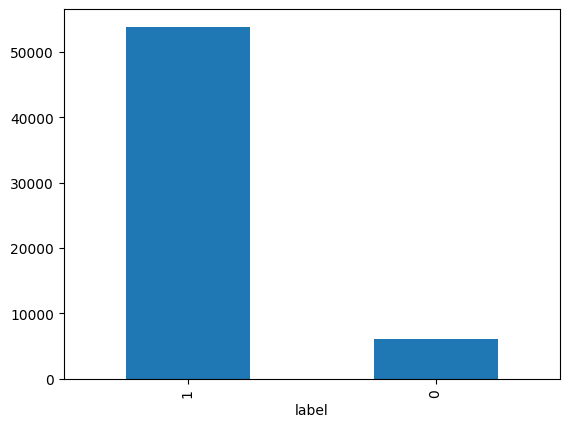

In [21]:
df["label"].value_counts().plot(kind='bar');

# On note une désequilibre des classes. Nous avons environ 90% des tweets suspect et 10% pour les tweets non suspects

## <font color = 'blue'> 1.Prétraitement des données

In [6]:
# Nettoyage des données, normalisation et lemmatisation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Conversion en minuscules
    text = text.lower()
    # Suppression de la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenisation et suppression des stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    # Lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Application du prétraitement sur la colonne 'message'
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Afficher les premières lignes pour vérifier le nettoyage
df[['message', 'cleaned_message']].head()

,message,cleaned_message
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save 50 ...
3,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


## <font color = 'blue'> 2.Embedding des données avec TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limite à 5000 termes pour réduire la dimensionnalité
X = vectorizer.fit_transform(df['cleaned_message'])

# Séparation des données en train/test
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# dataset = 80% et le testset = 20% 

## <font color ='blue'> 3.Construction du modèle de classification(LogisticRegression)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = model.predict(X_test)

# <font color ='blue'> 4.Évaluation du modèle

In [17]:
# Étape 5 : Évaluation du modèle
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non Suspect', 'Suspect'], yticklabels=['Non Suspect', 'Suspect'])
plt.title('Matrice de confusion')
plt.ylabel('Vrai label')
plt.xlabel('Prédiction')
plt.show()

# Sauvegarder le modèle et l'embedding
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Courbe ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_auc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

# AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {roc_auc}')

Classification Report:


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [25]:
# Modèle de deep learning

In [27]:
! pip install pandas numpy scikit-learn keras tensorflow

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report

In [15]:
# Modèle de deep learning
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Utilisez 'softmax' si vous avez plus de 2 classes

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Évaluation du modèle
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred_classes, target_names=['Non suspect', 'Suspect']))

Epoch 1/100


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9123 - loss: 0.3113 - val_accuracy: 0.9664 - val_loss: 0.1362
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9728 - loss: 0.1025 - val_accuracy: 0.9686 - val_loss: 0.1313
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9805 - loss: 0.0748 - val_accuracy: 0.9692 - val_loss: 0.1362
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9838 - loss: 0.0558 - val_accuracy: 0.9674 - val_loss: 0.1603
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9887 - loss: 0.0361 - val_accuracy: 0.9651 - val_loss: 0.1917
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9647 - val_loss: 0.2644
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9974 - loss: 0.0099 - val_accuracy: 0.9646 - val_loss: 0.3005
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9985 - loss: 0.0059 - val_accuracy: 0.9643

# Code interactif pour tester le modèle avec de nouveaux tweets

In [ ]:
# Code interactif pour tester le modèle avec de nouveaux tweets
import joblib

# Charger le modèle et le vectoriseur TF-IDF préalablement sauvegardés
model = joblib.load('logistic_regression_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Fonction de prétraitement à réutiliser (comme précédemment)
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Fonction pour tester un ou plusieurs nouveaux tweets
def predict_tweet():
    while True:
        new_tweet = input("Saisissez un tweet à analyser (ou tapez 'quit' pour arrêter) : ")
        if new_tweet.lower() == 'quit':
            break
        
        # Prétraitement du tweet
        cleaned_tweet = preprocess_text(new_tweet)
        
        # Transformer le tweet avec le vectoriseur TF-IDF
        tweet_vector = vectorizer.transform([cleaned_tweet])
        
        # Faire la prédiction
        prediction = model.predict(tweet_vector)
        
        # Afficher le résultat
        if prediction == 1:
            print("Le tweet est suspect (menaces, terrorisme, intimidation...).\n")
        else:
            print("Le tweet n'est pas suspect.\n")

# Appel de la fonction pour tester des tweets interactivement
predict_tweet()


In [ ]:
import streamlit
! streamlit run NLP.py